In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

In [3]:
df = pd.read_csv("ipl_data.csv")


In [4]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [5]:
df.shape

(76014, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [7]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [9]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [10]:
df.size

1140210

In [11]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [12]:
df1 = df.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [13]:
X = df1.drop(['total'], axis = 1)
y = df1['total']

In [14]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [17]:
# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
battling_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

In [18]:
# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = battling_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [24]:
# Define the neural network model
model = keras.Sequential([keras.layers.Input(shape = (X_train_scaled.shape[1],)),
                               keras.layers.Dense(512, activation = 'relu'),
                               keras.layers.Dense(216, activation = 'relu'),
                               keras.layers.Dense(1, activation = 'linear')])

In [25]:
# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta = 1.0)
model.compile(optimizer = 'adam', loss=huber_loss)

In [42]:
# Train the Model
model.fit(X_train_scaled, y_train, epochs = 500, batch_size = 64, validation_data = (X_test_scaled, y_test))

Epoch 1/500
832/832 [==============================] - 3s 3ms/step - loss: 14.4990 - val_loss: 15.0488
Epoch 2/500
832/832 [==============================] - 2s 3ms/step - loss: 14.5571 - val_loss: 15.5720
Epoch 3/500
832/832 [==============================] - 2s 3ms/step - loss: 14.4239 - val_loss: 14.8928
Epoch 4/500
832/832 [==============================] - 3s 3ms/step - loss: 14.5048 - val_loss: 14.2742
Epoch 5/500
832/832 [==============================] - 3s 3ms/step - loss: 14.4355 - val_loss: 14.2075
Epoch 6/500
832/832 [==============================] - 2s 3ms/step - loss: 14.3763 - val_loss: 15.1767
Epoch 7/500
832/832 [==============================] - 3s 3ms/step - loss: 14.3723 - val_loss: 14.2327
Epoch 8/500
832/832 [==============================] - 3s 3ms/step - loss: 14.3259 - val_loss: 14.6277
Epoch 9/500
832/832 [==============================] - 2s 3ms/step - loss: 14.3475 - val_loss: 14.4411
Epoch 10/500
832/832 [==============================] - 3s 3ms/step - los

In [43]:
model_losses = pd.DataFrame(model.history.history)

<Axes: >

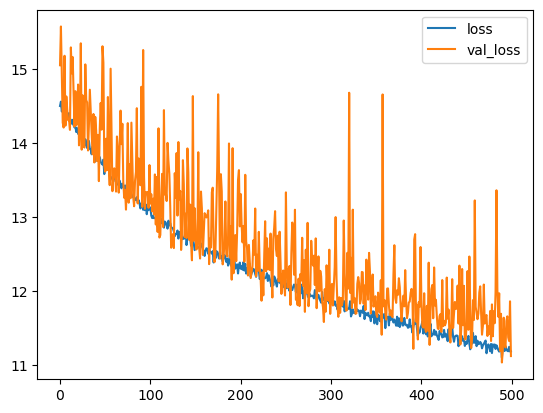

In [44]:
model_losses.plot()

In [45]:
# Make Prediction
y_pred = model.predict(X_test_scaled)

713/713 [==============================] - 2s 3ms/step


In [46]:
from sklearn.metrics import mean_absolute_error, r2_score

In [47]:
mean_absolute_error(y_test, y_pred)

11.605422890664611

In [48]:
r2_score(y_test, y_pred)

0.5875355257506076

In [49]:
# Create an Interactive Widget
import ipywidgets as widgets
from IPython.display import display, clear_output

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

In [52]:
predict_button = widgets.Button(description="Predict Score")

In [58]:
def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
         
 
        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])
       
 
        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])
 
        print(predicted_score)

In [60]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', index=2, options=('M Chinnaswamy Stadium', 'Punjab Cricket Association S…

Dropdown(description='Select Batting Team:', index=1, options=('Kolkata Knight Riders', 'Chennai Super Kings',…

Dropdown(description='Select Batting Team:', index=1, options=('Royal Challengers Bangalore', 'Kings XI Punjab…

Dropdown(description='Select Striker:', index=12, options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Huss…

Dropdown(description='Select Bowler:', index=9, options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Jo…

Button(description='Predict Score', style=ButtonStyle())

Output()